In [29]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip, spon_ana
import seaborn as sns
from scipy import stats as st
import pickle
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('classic')

% matplotlib inline
# % matplotlib notebook

%load_ext autoreload
% autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
EI_data_source = ['ana_pre_2Hz_reci', 'ana_naspm', 'ana_pre_50Hz_reci']

In [ ]:
# # Get E-I stimulated amplitude
# ei_amp = []
# for i in range(len(EI_data_source)):
#     data = pd.read_pickle('/data/'+EI_data_source[i])
#     for k in range(len(data)):
#         ei_amp.append(data.iloc[k].Before['raw_amp1'])
#     del data
# ei_amp = np.hstack(ei_amp)
# ei_amp = ei_amp[~np.isnan(ei_amp)]
# np.save('/data/ei_raw_amp', ei_amp)

In [31]:
II_data_source = ['ana_ii']

In [33]:
# # Get I-I stimulated amplitude
# ii_amp = []
# for i in range(len(II_data_source)):
#     data = pd.read_pickle('/data/'+II_data_source[i])
#     for k in range(len(data)):
#         ii_amp.append(data.iloc[k].Before['raw_amp1'])
#     del data
# ii_amp = np.hstack(ii_amp)
# ii_amp = ii_amp[~np.isnan(ii_amp)]
# np.save('/data/ii_raw_amp', ii_amp)

In [54]:
# # Get E-I stimulated amplitude
# ie_amp = []
# for i in range(len(IE_data_source)):
#     data = pd.read_pickle('/data/'+IE_data_source[i])
#     for k in range(len(data)):
#         ie_amp.append(data.iloc[k].Before['decay_tau'])
#     del data
# ie_amp = np.hstack(ie_amp)
# ie_amp = ie_amp[~np.isnan(ie_amp)]
# np.save('/data/ie_decay_tau', ie_amp)

In [37]:
ei_amp = np.load('/data/ei_raw_amp.npy')[:375]
ie_amp = np.load('/data/ii_raw_amp.npy')[:375]
ei_amp_mean = np.mean(ei_amp)
ei_amp_std = np.std(ei_amp)/np.sqrt(375)
ie_amp_mean = np.mean(ie_amp)
ie_amp_std = np.std(ie_amp)/np.sqrt(375)

In [38]:
ei_amp_mean

7.2387566436277297e-11

In [39]:
ei_amp = np.load('/data/ei_decay_tau.npy')[:375]
ie_amp = np.load('/data/ii_decay_tau.npy')[:375]
ei_amp_mean = np.mean(ei_amp)
ei_amp_std = np.std(ei_amp)/np.sqrt(375)
ie_amp_mean = np.mean(ie_amp)
ie_amp_std = np.std(ie_amp)/np.sqrt(375)

In [40]:
# plt.hist(np.log(ei_amp), alpha=0.5)
# plt.hist(np.log(ie_amp), alpha=0.5)
# plt.hist(np.log(mini_amp), alpha=0.5)

In [41]:
# plt.hist(ei_amp, alpha=0.5)

In [42]:
# Get baseline synaptic transmission from before NASPM
data_naspm = pd.read_pickle('/data/ana_naspm')

In [44]:
data_index = list(data_naspm.index)
mini_amp = []
for i in range(len(data_naspm)):
    psc_naspm_bef = pd.read_pickle('/data/psc_naspm_100uM_slope2_thres2.5_before_'+str(data_index[i]))
    psc_naspm_aft = pd.read_pickle('/data/psc_naspm_100uM_slope2_thres2.5_after_'+str(data_index[i]))
    para_bef, para_aft = spon_ana.pair_amp_tau(psc_naspm_bef, psc_naspm_aft)
    mini_amp.append(para_bef['decay_tau'])
mini_amp = np.hstack(mini_amp)[:375]
mini_amp = mini_amp[~np.isnan(mini_amp)]

(array([ 13.,  58.,  97.,  96.,  54.,  50.,  37.,  14.,  15.,   4.,   4.,
          1.,   1.,   2.,   0.,   2.,   0.,   0.,   0.,   1.]),
 array([ 0.00033124,  0.00079202,  0.0012528 ,  0.00171358,  0.00217436,
         0.00263514,  0.00309592,  0.0035567 ,  0.00401748,  0.00447826,
         0.00493904,  0.00539982,  0.00586061,  0.00632139,  0.00678217,
         0.00724295,  0.00770373,  0.00816451,  0.00862529,  0.00908607,
         0.00954685]),
 <a list of 20 Patch objects>)

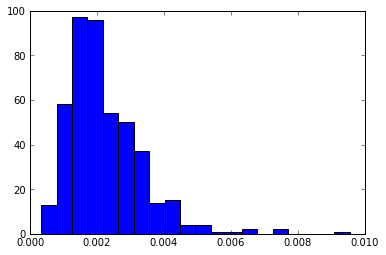

In [49]:
plt.hist(para_bef['decay_tau'], bins=20)

In [46]:
mini_amp_mean = np.mean(mini_amp)
mini_amp_std = np.std(mini_amp)/np.sqrt(375)

In [47]:
mini_amp_std

4.6784645976484961e-05

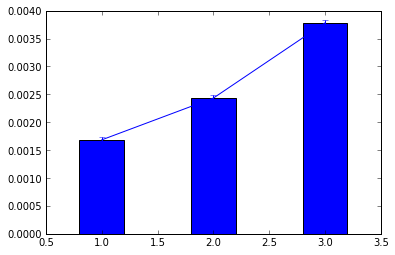

In [48]:
plt.bar([1,2,3], [mini_amp_mean, ei_amp_mean, ie_amp_mean], width=0.4,align='center')
plt.errorbar([1,2,3], [mini_amp_mean, ei_amp_mean, ie_amp_mean], [mini_amp_std, ei_amp_std, ie_amp_std])
# plt.ylim([0,0.8e-10])

with PdfPages('/data/amp_elic_mini_comp.pdf') as pdf:
    pdf.savefig()

In [29]:
amp_data = pd.DataFrame(data=np.concatenate([mini_amp,ei_amp,ie_amp]), columns=['amp'])
# amp_data['loc_index'] = np.concatenate([np.ones(len(mini_amp)), np.ones(len(mini_amp))*2, np.ones(len(mini_amp))*3])

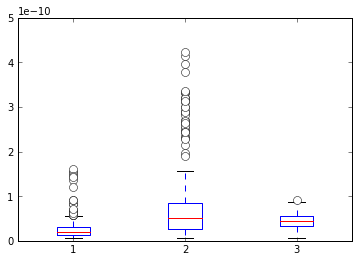

In [28]:
flierprops = dict(marker='o', markersize=8,markerfacecolor='white',linestyle='none')
plt.boxplot([mini_amp.reshape(-1,1),ei_amp.reshape(-1,1),ie_amp.reshape(-1,1)],flierprops=flierprops)
plt.ylim([0,5e-10])

with PdfPages('/data/amp_elic_mini_comp.pdf') as pdf:
    pdf.savefig()

In [21]:
ax = sns.boxplot(x="loc_index", y="amp", data=amp_data, fliersize=0.001)
ax = sns.swarmplot(x="loc_index", y="amp", data=amp_data, color=".25")

ValueError: Could not interpret input 'loc_index'

In [33]:
st.ttest_ind(mini_amp.reshape(-1,1), ie_amp.reshape(-1,1))

Ttest_indResult(statistic=array([-17.0418309]), pvalue=array([  1.71093977e-50]))

In [33]:
ie_amp.shape

(375,)